<a href="https://colab.research.google.com/github/ilmechaJu/keras/blob/main/ch04_%EC%BC%80%EB%9D%BC%EC%8A%A4_%EC%BB%A8%EB%B3%BC%EB%A3%A8%EC%85%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 컨볼루션 신경망(Convolution Neural Network, CNN)

## 주요 레이어

### Conv2D

- `tensorflow.keras.layers.Conv2D`

- `tf.nn.conv2d`

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import numpy as np
from sklearn.datasets import load_sample_image

In [ ]:
china = load_sample_image('china.jpg') / 255 # 255 로 나눠서 uint8 타입을 float64로 맞춰준다
print(china.dtype)
print(china.shape)      

float64
(427, 640, 3)


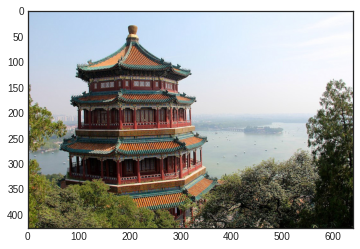

In [ ]:
plt.imshow(china)

In [ ]:
flower = load_sample_image('flower.jpg') / 255
print(flower.dtype)
print(flower.shape)

float64
(427, 640, 3)


In [ ]:
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
print(images.shape)

(2, 427, 640, 3)


In [ ]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32) #여기 중요함 filters
filters[:, 3, :, 0] = 1 
filters[3, :, :, 1] = 1

print(filters.shape)

(7, 7, 3, 2)


(2, 427, 640, 2)


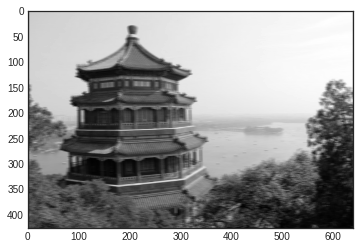

In [ ]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME") #error conv2d에는 모두 float64타입이어야 됨 
print(outputs.shape)
plt.imshow(outputs[0, :, :, 1], cmap='gray')
plt.show()                                                          #텐서플로 형식 CNN

(2, 427, 640, 2)


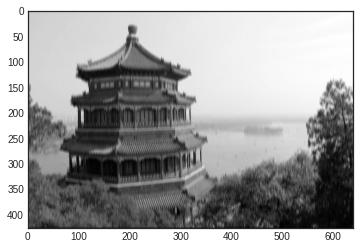

In [ ]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME") 
print(outputs.shape)
plt.imshow(outputs[0, :, :, 0], cmap='gray') #필터 1->0으로 변경
plt.show()

In [ ]:
conv = Conv2D(filters=32, kernel_size=3, strides=1,
              padding='same', activation='relu') # 케라스형식 CNN

### MaxPool2D

- 텐서플로 저수준 딥러닝 API
  - `tf.nn.max_pool`
  - 사용자가 사이즈를 맞춰줘야함
  - 케라스의 모델의 층으로 사용하고 싶으면 Lambda층으로 감싸줘야함

- 케라스 고수준 API
  - `keras.layers.MaxPool2D`


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D, Lambda

In [ ]:
#max_pool은 TPU만 가능하다 (CPU만 가능하다.)
output = tf.nn.max_pool(images,
                        ksize=(1,1,1,3),
                        strides=(1,1,1,3),
                        padding='VALID')


In [ ]:
output_keras = Lambda(
    lambda X: tf.nn.max_pool(X, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3), padding='VALID')
)

In [ ]:
max_pool = MaxPool2D(pool_size=2)

In [ ]:
flower = load_sample_image('flower.jpg') / 255
print(flower.dtype)
print(flower.shape)

float64
(427, 640, 3)


In [ ]:
flower = np.expand_dims(flower, axis=0) #dimension(차원) 추가
flower.shape

(1, 427, 640, 3)

In [ ]:
output = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(flower)
output = MaxPool2D(pool_size=2)(output) #pooling size 2로줬으니까 2만큼씩 합친다. 합친 값에서 MAX값을 취한다.

output.shape

TensorShape([1, 213, 320, 32])

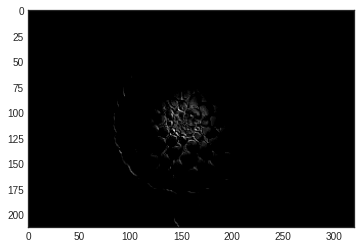

In [ ]:
plt.imshow(output[0, :, :, 8], cmap='gray')
plt.show()

### AvgPool2D

- 텐서플로 저수준 딥러닝 API
  - `tf.nn.avg_pool`

- 케라스 고수준 API
  - `keras.layers.AvgPool2D`

In [ ]:
from tensorflow.keras.layers import AvgPool2D

In [ ]:
flower.shape

(1, 427, 640, 3)

In [ ]:
output = Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu')(flower)
output = AvgPool2D(pool_size=2)(output)

output.shape

TensorShape([1, 213, 320, 32])

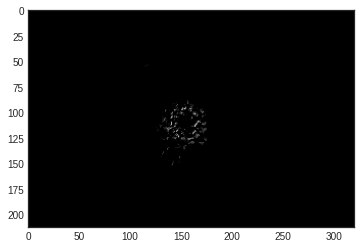

### GlobalAvgPool2D (전역 평균 풀링 층)

- `keras.layers.GlobalAvgPool2D()`

- 특징 맵 각각의 평균값을 출력하는 것이므로, 특성맵에 있는 대부분의 정보를 잃음

- 출력층에는 유용할 수 있음

In [ ]:
from tensorflow.keras.layers import GlobalAvgPool2D

In [ ]:
flower.shape

(1, 427, 640, 3)

In [ ]:
output = Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu')(flower)
output = GlobalAvgPool2D()(output)

output.shape

TensorShape([1, 32])

## 예제로 보는 CNN 구조와 학습
- 모델 구현은 참고만


- [런타임] - [런타임 유형변경] - GPU 변경

### 일반적인 구조

#### modules import

In [ ]:
%load_ext tensorboard

In [ ]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, AvgPool2D, Dropout

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical, plot_model

#### 데이터 로드 및 전처리

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train = x_train[:, :, :, np.newaxis] #x_train은 [all, all, all, 차원1개 추가]
x_test = x_test[:, :, :, np.newaxis]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [ ]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
#<정규화>
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
def build():
  model = Sequential([Conv2D(64, 7, activation='relu', padding='same', input_shape=[28, 28, 1]),
                      MaxPool2D(pool_size=2),
                      Conv2D(128, 3, activation='relu', padding='same'),
                      MaxPool2D(pool_size=2),
                      Conv2D(256, 3, activation='relu', padding='same'),
                      MaxPool2D(2),
                      Flatten(),
                      Dense(128, activation='relu'),
                      Dropout(0.5),
                      Dense(64, activation='relu'),
                      Dropout(0.5),
                      Dense(10, activation='softmax')])
  
  return model

#### CNN을 위한 간단한 모델

In [ ]:
model = build()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### 모델 컴파일

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

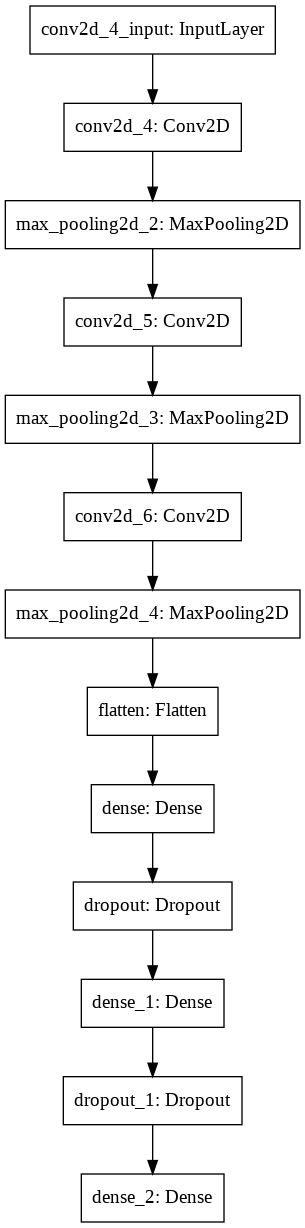

In [ ]:
plot_model(model)

In [ ]:
callbacks = [tf.keras.callbacks.TensorBoard(log_dir='./logs')]

#### Hyper Parameters

In [ ]:
EPOCHS = 20
BATCH_SIZE = 200
VERBOSE = 1

#### 모델 학습
- `validation_split` 을 통해 검증 데이터셋을 생성


In [ ]:
hist = model.fit(x_train, y_train,
                 epochs=EPOCHS,
                 batch_size=BATCH_SIZE,
                 validation_split=0.3,
                 callbacks=callbacks,
                 verbose=VERBOSE)

Epoch 1/20
210/210 [==============================] - 245s 1s/step - loss: 1.0164 - accuracy: 0.6375 - val_loss: 0.4780 - val_accuracy: 0.8182
Epoch 2/20
210/210 [==============================] - 263s 1s/step - loss: 0.5647 - accuracy: 0.8053 - val_loss: 0.3723 - val_accuracy: 0.8663
Epoch 3/20
210/210 [==============================] - 244s 1s/step - loss: 0.4535 - accuracy: 0.8439 - val_loss: 0.3293 - val_accuracy: 0.8806
Epoch 4/20
210/210 [==============================] - 262s 1s/step - loss: 0.3992 - accuracy: 0.8653 - val_loss: 0.3063 - val_accuracy: 0.8917
Epoch 5/20
210/210 [==============================] - 243s 1s/step - loss: 0.3657 - accuracy: 0.8760 - val_loss: 0.2916 - val_accuracy: 0.8956
Epoch 6/20
210/210 [==============================] - 262s 1s/step - loss: 0.3347 - accuracy: 0.8860 - val_loss: 0.2912 - val_accuracy: 0.8986
Epoch 7/20
210/210 [==============================] - 262s 1s/step - loss: 0.3135 - accuracy: 0.8924 - val_loss: 0.2668 - val_accuracy: 0.9039

In [ ]:
log_dir='.logs' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [ ]:
%tensorboard --logdir logs/

### LeNet-5(CNN 초창기 모델)

- 필기체 인식을 위한 모델

  <img src="https://hoya012.github.io/assets/img/image_classification_guidebook/1.PNG">

  <sub>https://www.researchgate.net/figure/The-LeNet-5-Architecture-a-convolutional-neural-network_fig4_321586653</sub>

- 코드 출처 : http://datahacker.rs/lenet-5-implementation-tensorflow-2-0/

#### module import

In [ ]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, AvgPool2D, Dropout

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical, plot_model

from sklearn.model_selection import train_test_split

#### 데이터 로드 및 전처리

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = dataset.mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=777)

x_train = x_train[..., np.newaxis]
x_val = x_val[..., np.newaxis]
x_test = x_test[..., np.newaxis]

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.
x_val /= 255.
x_test /= 255.

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

NameError: ignored

#### 모델 구성 및 컴파일

In [ ]:
class LeNet(Sequential):
  def __init__(self, input_shape, nb_classes):
    super().__init__()

    self.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='tanh', input_shape=input_shape, padding="same"))
    self.add(AvgPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    self.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))
    self.add(AvgPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    self.add(Flatten())
    self.add(Dense(120, activation='tanh'))
    self.add(Dense(84, activation='tanh'))
    self.add(Dense(nb_classes, activation='softmax'))

    self.compile(optimizer='adma',
                 loss='categorical+crossentropy',
                 metrics=['accuracy'])

In [ ]:
model = LeNet(input_shape=(28, 28, 1), nb_classes=10)

In [ ]:
model.summary()

In [ ]:
plot_model(model, show_shapes=True)

#### Hyper Parameters

In [ ]:
EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1

#### 모델 학습

In [ ]:
hist = model.fit(x_train, y_train,
                 epochs=EPOCHS,
                 batch_size=BATCH_SIZE,
                 validation_date=(x_val, y_val),
                 verbose=VERBOSE)
                

#### 학습 결과 시각화

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label='loss')
plt.plot(hist.history['val_loss'], 'm--', label='val_loss')
plt.xlabel("Epochs")
plt.ylim(0.8, 1.005)
plt.grid()
plt.legend()

#### 모델 평가

In [ ]:
model.evaluate(x_test, y_test)